In [2]:
import time
import requests
from bs4 import BeautifulSoup

# 目標URL網址
URL = "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Keyboards/zgbs/pc/12879431/ref=zg_bs_nav_pc_4_11036491_encoding=UTF8&pg={0}"
       
def generate_urls(url, start_page, end_page): #使用參數基底URL、開始和結束頁數來建立URL清單
    urls = []   #爬蟲主程式建立的目標網址清單
    for page in range(start_page, end_page+1):
        urls.append(url.format(page))
    return urls

def get_resource(url):
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
    return requests.get(url, headers=headers) 

def parse_html(html_str):
    return BeautifulSoup(html_str, "lxml")

def get_goods(soup):
    goods = []
    rows = soup.find_all("li", class_="zg-item-immersion")  #a-fixed-left-grid-col a-col-right  #a-section a-spacing-none aok-relative
    for row in rows:
        name = row.find("div", class_="a-section a-spacing-small").img["alt"]
        star = row.find("span", class_="a-icon-alt").text
        sample = row.find("a", class_="a-size-small a-link-normal")
        price = row.find("span", class_="p13n-sc-price").text
        
        good= [name, star, sample, price]
        goods.append(good)
    return goods

def web_scraping_bot(urls):
    all_goods = [["品名","評價","樣本數","價格"]]  #巢狀清單
    page = 1
    
    for url in urls:
        print("抓取: 第" + str(page) + "頁 網路資料中...")
        page = page + 1
        r = get_resource(url)
        if r.status_code == requests.codes.ok:
            soup = parse_html(r.text)
            goods = get_goods(soup)
            all_goods = all_goods + goods
            print("等待5秒鐘...")
            if soup.find("li", class_="nexttxt disabled"):
                break   #已經沒有下一頁
            time.sleep(5) 
        else:
            print("HTTP請求錯誤...")

    return all_goods

if __name__ == "__main__":
    urls = generate_urls(URL, 1, 1) 
    print(urls)
    goods = web_scraping_bot(urls) 
    for good in goods:
        print(good)

['https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Keyboards/zgbs/pc/12879431/ref=zg_bs_nav_pc_4_11036491_encoding=UTF8&pg=1']
抓取: 第1頁 網路資料中...


AttributeError: 'NoneType' object has no attribute 'text'

In [3]:
url = "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Keyboards/zgbs/pc/12879431/ref=zg_bs_nav_pc_4_11036491_encoding=UTF8&pg=1"
r = get_resource(url)
soup = parse_html(r.text)
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo">
<head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {
var ue_hob=+new Date();
var ue_id='H4M1FB5TPYQN204HWS9S',
ue_csm = window,
ue_err_chan = 'jserr-rw',
ue = {};
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);

ue.stub(ue,"log");ue.stub(ue,"onunload");ue.stub(ue,"onflush");

(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!=

In [66]:
url = "https://www.amazon.com/stores/page/51CB0C90-F824-42A4-AB2A-4E59DF5485CB?ingress=0&visitId=c8e1cde7-690f-4f26-88c5-4c6a6f56bb3b&lp_slot=auto-sparkle-hsa-tetris&store_ref=SB_A0251552145E5DJBRDDEB&productGridPageIndex=2"
r = get_resource(url)
soup = parse_html(r.text)
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="https://m.media-amazon.com" rel="dns-prefetch"/><link href="https://completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])}

<span class="a-icon-alt">4.2 out of 5 stars</span>

'<a class="a-size-small a-link-normal" href="/product-reviews/B07RJ63MPN/ref=zg_bs_12879431_cr_51/136-7892733-3479750?ie=UTF8&amp;refRID=09FY00V7DTP5E98K575S">399</a>'

In [53]:
url = "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Keyboards/zgbs/pc/12879431/ref=zg_bs_pg_2?_encoding=UTF8&pg=2"
r = get_resource(url)
soup = parse_html(r.text)
soup
reviews = soup.find("a", class_="a-size-small a-link-normal").text
reviews

'529'

['https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Mice/zgbs/pc/11036491/ref=zg_bs_pg_2?_encoding=UTF8&pg=1', 'https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Mice/zgbs/pc/11036491/ref=zg_bs_pg_2?_encoding=UTF8&pg=2', 'https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Mice/zgbs/pc/11036491/ref=zg_bs_pg_2?_encoding=UTF8&pg=3']
抓取: 第1頁 網路資料中...
等待5秒鐘...
抓取: 第2頁 網路資料中...
等待5秒鐘...
star  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.8  評價
name    1    2    2    4    5    8   18   17   31    9    2    1   1


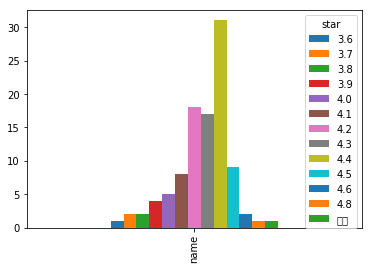

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 目標URL網址
URL = "https://www.amazon.com/Best-Sellers-Computers-Accessories-Computer-Mice/zgbs/pc/11036491/ref=zg_bs_pg_2?_encoding=UTF8&pg={0}"
       
def generate_urls(url, start_page, end_page): #使用參數基底URL、開始和結束頁數來建立URL清單
    urls = []   #爬蟲主程式建立的目標網址清單
    for page in range(start_page, end_page+1):
        urls.append(url.format(page))
    return urls

def get_resource(url):
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko)"
               "Chrome/63.0.3239.132 Safari/537.36"}
    return requests.get(url, headers=headers) 

def parse_html(html_str):
    return BeautifulSoup(html_str, "lxml")

def get_goods(soup):
    goods = []
    rows = soup.find_all("li", class_="zg-item-immersion")
    for row in rows:
        #照理說是直接取.text最快，但不知為何一直出現AttributeError: " 'NoneType' object has no attribute 'text' " 爬文也沒解
        #只好用str()將bs4.element.Tag轉換成字串，再使用 []取部分內容(這個動作叫 slicing)
        rank = row.find("span", class_="zg-badge-text").text
        name = row.find("div", class_="a-section a-spacing-small").img["alt"] #text無法取得，但<img>的alt也有同樣的品名
        star = str(row.find("span", class_="a-icon-alt"))[25:28]  #位置剛好都在25~28之間，所以轉換成str再slicing
        #下面兩行比較特別，先轉換成str，但位置都不同，所以得用find找">"和"<"的位置，再包在slicing中，等同取得">"到"<"之間的字串
        reviews_tag = str(row.find("a", class_="a-size-small a-link-normal"))
        reviews = reviews_tag[reviews_tag.find(">",1)+1 : reviews_tag.find("<",1)]
        price = str(row.find("span", class_="p13n-sc-price"))[28:33]
        
        good= [rank, name, star, reviews, price]
        goods.append(good)
    return goods

def web_scraping_bot(urls):
    all_goods = [["排名","品名","評價","評論數","價格"]]  #巢狀清單
    page = 1
    
    for url in urls:
        print("抓取: 第" + str(page) + "頁 網路資料中...")
        page = page + 1
        r = get_resource(url)
        if r.status_code == requests.codes.ok:
            soup = parse_html(r.text)
            goods = get_goods(soup)
            all_goods = all_goods + goods
            print("等待5秒鐘...")
            if soup.find("li", class_="a-disabled a-last"):
                break   #已經沒有下一頁
            time.sleep(5) 
        else:
            print("HTTP請求錯誤...")

    return all_goods

def save_to_csv(items, file):
    with open(file, "w+", newline="", encoding="utf_8_sig") as fp:  #utf_8_sig:能讓輸出的csv正確顯示中文(utf_8會有亂碼)
        writer = csv.writer(fp)
        for item in items:
            writer.writerow(item)

if __name__ == "__main__":
    urls = generate_urls(URL, 1, 3)  #爬取1~3頁
    print(urls)
    goods = web_scraping_bot(urls) 
    df = pd.DataFrame(goods)       #用dataframe列出
    #print(df)
    #for good in goods:                #用list列出
    #    print(good)
    
    #save_to_csv(goods, "Amazon_Mouse_Rank.csv")
    
"""
資料分析部分
"""

df.columns = ["rank", "name", "star", "reviews", "price"]  #重新命名欄位名稱
df_pivot = df.pivot_table(values = "name", columns = "star", aggfunc=np.count_nonzero)
print(df_pivot)
    
df_pivot.plot(kind = 'bar')
plt.show()

<a class="a-link-normal" href="/product-reviews/B014EUQOGK/ref=zg_bs_12879431_cr_1/130-9654306-3580753?ie=UTF8&amp;refRID=SA898QYDMXSG9796FQHK" title="4.2 out of 5 stars">